# Football Transfers Seasons 2000 - 2019

This is the project EDA created for demonstration of different analysis and visualisation techniques.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
params = {'axes.facecolor': '#F8F7E9',
 'axes.edgecolor': 'black',
 'axes.labelcolor': 'black',
 'figure.facecolor': '#F8F7E9',
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'axes.titlesize': 'Large',
 'axes.labelsize': 'Large',
 'patch.edgecolor': 'white',
 'patch.force_edgecolor': True,
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.right': False,
 'axes.spines.top': False}

sns.set_theme(style = 'whitegrid',rc = params)
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

## Importing data

In [3]:
df = pd.read_csv("fotbal_prestupy_2000_2019.csv")

In [4]:
df.head()

,Jméno,Pozice,Věk,Původní tým,Původní liga,Nový tým,Nová Liga,Sezóna,Odhadovaná hodnota,Přestupová částka
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


In [5]:
df.shape

(4700, 10)

Data consists of 10 columns and 4700 rows. Let's check type of the values and missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Jméno               4700 non-null   object 
 1   Pozice              4700 non-null   object 
 2   Věk                 4700 non-null   int64  
 3   Původní tým         4700 non-null   object 
 4   Původní liga        4700 non-null   object 
 5   Nový tým            4700 non-null   object 
 6   Nová  Liga          4700 non-null   object 
 7   Sezóna              4700 non-null   object 
 8   Odhadovaná hodnota  3440 non-null   float64
 9   Přestupová částka   4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


We have only 3 parameters with numerical values and one of them (Odhadovaná hodnota) has 1260 missing values. Before we start extracting information let's check if there are hiding some zero or wrong values.

## Data cleaning

Before cleaning let's check number of unique values for the dataframe.

In [7]:
df.nunique()

Jméno                 3104
Pozice                  17
Věk                     22
Původní tým            570
Původní liga           118
Nový tým               325
Nová  Liga              65
Sezóna                  19
Odhadovaná hodnota     180
Přestupová částka      507
dtype: int64

We can see that most of the unique values have parameter "Jméno". Because the number of names is lesser than total number of rows we can assume that several players have had transfered more than once during seasons. Number of original leagues and clubs is bigger than new ones which is logical: players transferes to more prestige leagues/clubs from lesser ones. </br>

Let's check "Jméno" parameter.

In [8]:
for name in df["Jméno"]:
    if len(name) <= 1:
        print(name)

All names have at least 2 characters. We can conclude that there are no zero values.

In [9]:
df["Pozice"].unique()

array(['Right Winger', 'Centre-Forward', 'Left Winger', 'Centre-Back',
       'Central Midfield', 'Attacking Midfield', 'Defensive Midfield',
       'Second Striker', 'Goalkeeper', 'Right-Back', 'Left Midfield',
       'Left-Back', 'Right Midfield', 'Forward', 'Sweeper', 'Defender',
       'Midfielder'], dtype=object)

Pozice looks okay.

In [10]:
df["Věk"].unique()

array([27, 25, 31, 21, 22, 26, 28, 23, 19, 24, 30, 20, 29, 35, 18, 32,  0,
       33, 34, 17, 16, 15])

we have zero value. Let's check how many players have this value.

In [11]:
df[df["Věk"]==0]

,Jméno,Pozice,Věk,Původní tým,Původní liga,Nový tým,Nová Liga,Sezóna,Odhadovaná hodnota,Přestupová částka
236,Marzouq Al-Otaibi,Centre-Forward,0,Shabab,Saudi Arabia,Ittihad,Saudi Arabia,2000-2001,NaN,2000000


Only one player have this value. We can find his age from the internet or fill it with mean value.

In [12]:
df["Věk"].mean()

24.33872340425532

From the internet we found that Marzouq Al-Otaibi was 26 years old in the season 2000-2001. We will replase zero value.

In [13]:
df["Věk"] = df["Věk"].replace([0], 26)

In [14]:
for team in df["Původní tým"].unique():
    if len(team) <= 3:
        print(team)

QPR
Rad


Original team has no wrong values.

In [15]:
for team in df["Původní liga"].unique():
    if len(team) <= 3:
        print(team)

MLS


In [16]:
for team in df["Nová  Liga"].unique():
    if len(team) <= 3:
        print(team)

MLS


We can conclude that teams and leagues have not wrong values

In [17]:
df["Sezóna"].unique()

array(['2000-2001', '2001-2002', '2002-2003', '2003-2004', '2004-2005',
       '2005-2006', '2006-2007', '2007-2008', '2008-2009', '2009-2010',
       '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015',
       '2015-2016', '2016-2017', '2017-2018', '2018-2019'], dtype=object)

Season looks good. Now, before we will observe "Odhadovaná hodnota", let's check the "Přestupová částka"

In [18]:
print(df["Přestupová částka"].min())
print(df["Přestupová částka"].max())

825000
222000000


Everything looks good. Now we can observe the "Odhadovaná hodnota" parameter. It has 1260 missing values. Let's find out how can we fill it.

In [19]:
print(df["Odhadovaná hodnota"].min())
print(df["Odhadovaná hodnota"].max())

50000.0
120000000.0


There is no zero in non-missing values.

As it was mentioned earlier, there only 3 columns with numerical values. To create the correlation map, we need to transform our categorical parameters into numerical ones. We will use label encoder for this purpose. </br>
First, let's mark all the columns we want to encode.

In [20]:
columns = df.columns[:-2]
columns

Index(['Jméno', 'Pozice', 'Věk', 'Původní tým', 'Původní liga', 'Nový tým',
       'Nová  Liga', 'Sezóna'],
      dtype='object')

In [21]:
columns = list(columns)

In [22]:
columns.pop(2)
columns

['Jméno',
 'Pozice',
 'Původní tým',
 'Původní liga',
 'Nový tým',
 'Nová  Liga',
 'Sezóna']

Importing label enocder and encoding the columns.

In [23]:
df_encode = df.copy()

In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in columns:
    df_encode[column] = labelencoder.fit_transform(df_encode[column])

Creating heatmap of correlations.

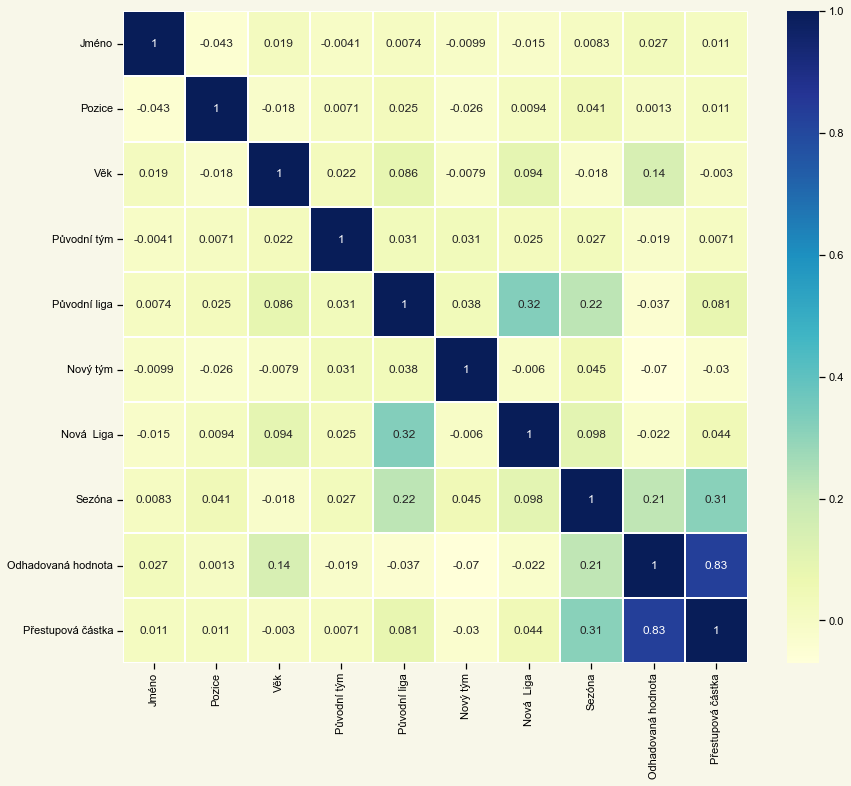

In [25]:
plt.figure(figsize=(14,12))
sns.heatmap(df_encode.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

As we can see, the "Odhadovaná hodnota" parameter is most correlated with "Přestupová částka", which is no surprise. Next close parameter is 'Sezóna' (0,21) and then 'Věk' (0,14). All other parameters are have almost zero correlation. Even 'Sezóna' and 'Věk' have quite poor values of coefficient. Predictions based only on one parameter will lead to errors, so we will not fill the "Odhadovaná hodnota" parameter and will use its non-missing values in our further steps.

## Extraction of information

First, let's start with values "of all time".

From earlier EDA we already know that maximum price for the player is 222 000 000, let's find out this player.

In [26]:
df[df["Přestupová částka"] == 222000000]

,Jméno,Pozice,Věk,Původní tým,Původní liga,Nový tým,Nová Liga,Sezóna,Odhadovaná hodnota,Přestupová částka
4211,Neymar,Left Winger,25,FC Barcelona,LaLiga,Paris SG,Ligue 1,2017-2018,100000000.0,222000000


Neymar is the most priciest player of all seasons. Next is the player with least price, which is 825 000

In [27]:
df[df["Přestupová částka"] == 825000]

,Jméno,Pozice,Věk,Původní tým,Původní liga,Nový tým,Nová Liga,Sezóna,Odhadovaná hodnota,Přestupová částka
741,Rémo Meyer,Centre-Back,21,Lausanne-Sport,Challenge League,1860 Munich,1.Bundesliga,2002-2003,NaN,825000


Let's check the ratio between prices of these two players.

In [28]:
df["Přestupová částka"].max()/df["Přestupová částka"].min()

269.09090909090907

The ratio between minimum price and maximum one is 269. Pretty impressive.

Now, let's check top 5 players.

In [29]:
df_top5 = df.copy()
df_top5 = df_top5.groupby(["Sezóna", "Jméno", "Pozice", "Věk"])["Přestupová částka"].sum().reset_index()
df_top5 = df_top5.sort_values(by=["Přestupová částka"],ascending = False)
df_top5.head(5)

,Sezóna,Jméno,Pozice,Věk,Přestupová částka
4346,2017-2018,Neymar,Left Winger,25,222000000
4553,2018-2019,Kylian Mbappé,Right Winger,19,135000000
4362,2017-2018,Philippe Coutinho,Attacking Midfield,25,125000000
4468,2018-2019,Cristiano Ronaldo,Centre-Forward,33,117000000
4356,2017-2018,Ousmane Dembélé,Right Winger,20,115000000


Now, let's check top 5 clubs, who spent the most.

In [30]:
df_top5buy = df.copy()
df_top5buy = df_top5buy.groupby(["Nový tým"])["Přestupová částka"].sum().reset_index()
df_top5buy = df_top5buy.sort_values(by=["Přestupová částka"],ascending = False)
df_top5buy.head(5)

,Nový tým,Přestupová částka
83,Chelsea,1820650000
192,Man City,1800520000
243,Real Madrid,1680650000
110,FC Barcelona,1673040000
194,Man Utd,1497360000


Chelsea is the club wich spent the most with value of 1 820 650 000. Out of curiosity let's check the club with the least spent and compare it to Chelsea.

In [31]:
df_top5buy["Přestupová částka"].min()

900000

In [32]:
df_top5buy[df_top5buy["Přestupová částka"] == 900000]

,Nový tým,Přestupová částka
33,Ascoli,900000


In [33]:
df_top5buy["Přestupová částka"].max()/df_top5buy["Přestupová částka"].min()

2022.9444444444443

The team with the least spent is Ascoli and compare to Chelsea it spent almost 2023 times less money!

Now it is time for the top 5 clubs, who receive the most.

In [34]:
df_top5sell = df.copy()
df_top5sell = df_top5sell.groupby(["Původní tým"])["Přestupová částka"].sum().reset_index()
df_top5sell = df_top5sell.sort_values(by=["Přestupová částka"],ascending = False)
df_top5sell.head(5)

,Původní tým,Přestupová částka
348,Monaco,948170000
197,FC Porto,917550000
426,Real Madrid,891400000
124,Chelsea,839530000
321,Liverpool,798410000


Chelsea is in the both top 5.

We have total value of fee spent by teams and total value of fee recieved by teams. What if we find the difference between these values and create top 5 of clubs with the biggest profit?

In [35]:
df_top5buy = df_top5buy.rename(columns={"Nový tým":"Původní tým"})
data_profit = pd.merge(df_top5sell, df_top5buy, on = "Původní tým")
data_profit["Result"] = data_profit["Přestupová částka_x"] - data_profit["Přestupová částka_y"]
data_profit = data_profit.sort_values(by=["Result"],ascending = False)
data_profit

,Původní tým,Přestupová částka_x,Přestupová částka_y,Result
1,FC Porto,917550000,360810000,556740000
6,Benfica,785750000,334700000,451050000
21,Udinese Calcio,472500000,130000000,342500000
34,River Plate,348230000,23600000,324630000
15,Parma,554320000,290530000,263790000
...,...,...,...,...
29,Paris SG,394630000,1274780000,-880150000
8,FC Barcelona,752100000,1673040000,-920940000
18,Man Utd,527570000,1497360000,-969790000
3,Chelsea,839530000,1820650000,-981120000


In [36]:
data_profit_top5 = data_profit.copy()
data_profit_top5 = data_profit_top5.head(5)
data_profit_tail5 = data_profit.copy()
data_profit_tail5 = data_profit_tail5.tail(5)

data_profit_tops = pd.concat([data_profit_top5, data_profit_tail5])
data_profit_tops

,Původní tým,Přestupová částka_x,Přestupová částka_y,Result
1,FC Porto,917550000,360810000,556740000
6,Benfica,785750000,334700000,451050000
21,Udinese Calcio,472500000,130000000,342500000
34,River Plate,348230000,23600000,324630000
15,Parma,554320000,290530000,263790000
29,Paris SG,394630000,1274780000,-880150000
8,FC Barcelona,752100000,1673040000,-920940000
18,Man Utd,527570000,1497360000,-969790000
3,Chelsea,839530000,1820650000,-981120000
27,Man City,419250000,1800520000,-1381270000


Now let's check leagues.

<AxesSubplot:xlabel='Původní tým', ylabel='Result'>

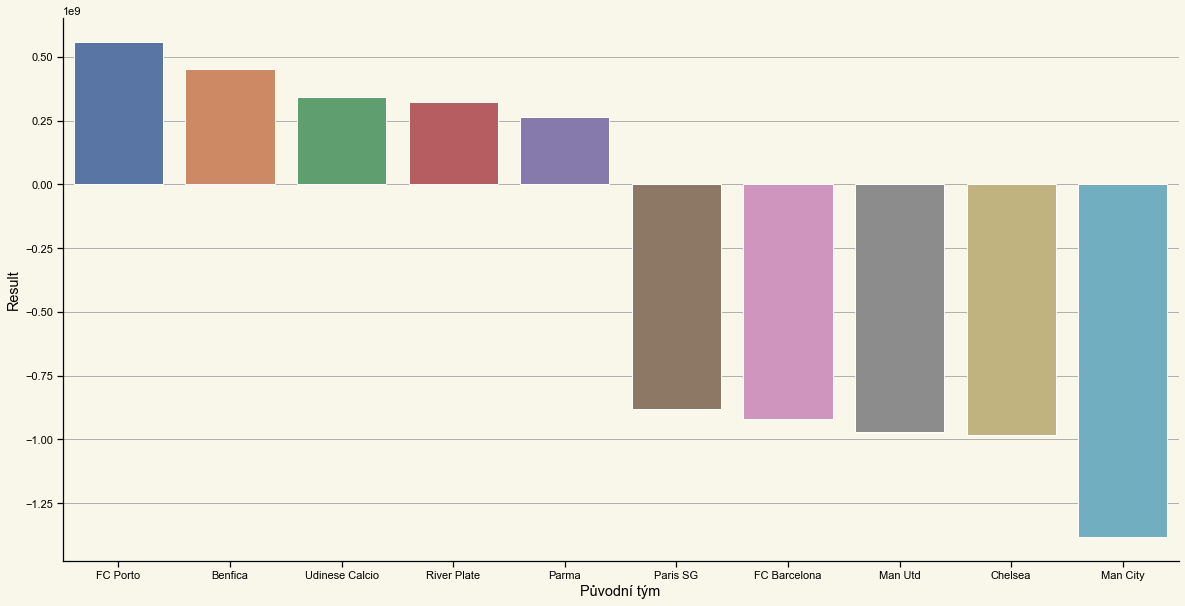

In [37]:
plt.figure(figsize=(20,10))
sns.barplot(data = data_profit_tops, x = "Původní tým", y = "Result")

Team with the biggest "pure" profit is FC Porto with value 556 740 000. Man City has a "pure" losses 1 381 270 000 and is a winner in this category.

In [38]:
df_top5l = df.copy()
df_top5l = df_top5l.groupby(["Nová  Liga"])["Přestupová částka"].sum().reset_index()
df_top5l = df_top5l.sort_values(by=["Přestupová částka"],ascending = False)
df_top5l.head(5)

,Nová Liga,Přestupová částka
46,Premier League,14695400000
54,Serie A,7535220000
36,LaLiga,6680360000
43,Ligue 1,3682720000
24,1.Bundesliga,3599645000


Top 5 leagues are European leagues. England on the first place, Italy on the second and Spain on the third. This means that European football market is the largest one.

In [39]:
df_top5l = df.copy()
df_top5l = df_top5l.groupby(["Původní liga"])["Přestupová částka"].sum().reset_index()
df_top5l = df_top5l.sort_values(by=["Přestupová částka"],ascending = False)
df_top5l.head(5)

,Původní liga,Přestupová částka
84,Premier League,7248510000
97,Serie A,7083980000
68,LaLiga,5533860000
78,Ligue 1,4396890000
40,1.Bundesliga,3062960000


Again top 5 are European leagues with the same order.

Now it is time to check seasons.

In [40]:
df_top5s = df.copy()
df_top5s = df_top5s.groupby(["Sezóna"])["Přestupová částka"].sum().reset_index()
df_top5s = df_top5s.sort_values(by=["Přestupová částka"],ascending = False)
df_top5s.head(5)

,Sezóna,Přestupová částka
17,2017-2018,4748180000
16,2016-2017,3979920000
18,2018-2019,3435670000
15,2015-2016,3415910000
13,2013-2014,2878720000


We can also make visualisation of seasons.

<AxesSubplot:xlabel='Sezóna', ylabel='Přestupová částka'>

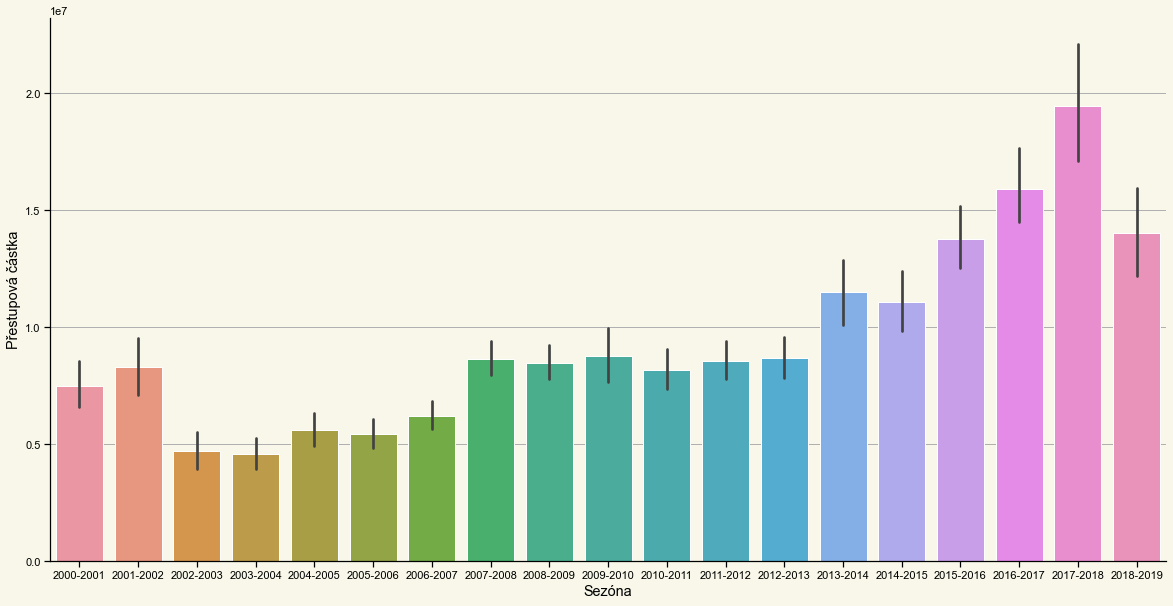

In [41]:
plt.figure(figsize=(20,10))
sns.barplot(data = df, x = "Sezóna", y = "Přestupová částka")

Unsurprisingly in top 5 are the last 5 season. The last season is only on the third place. From the graph above we can observe stagnation in seasons 2007-2013 (possibly due to World Economical Crysis) and decrease in fee value for the last season (reason is unknown).

Another interesting parameter is the "Pozice". Let's find out the most transferring positions.

In [42]:
df_top5_pozice = df.copy()
df_top5_pozice = df_top5_pozice.groupby(["Pozice"])["Přestupová částka"].mean().reset_index()
df_top5_pozice = df_top5_pozice.sort_values(by=["Přestupová částka"],ascending = False)
df_top5_pozice.head(5)

,Pozice,Přestupová částka
9,Left Winger,1.290464e+07
13,Right Winger,1.193036e+07
1,Central Midfield,1.009624e+07
0,Attacking Midfield,9.824178e+06
3,Centre-Forward,9.590271e+06


If we look on the mean values for each position, we will see that the most priceable position is Left Winger followed by Right winger and Central Midfield. This can be explained by top 5 of player where on the first three places are players with dame positions.

In [43]:
df_top5_pozice_sum = df.copy()
df_top5_pozice_sum = df_top5_pozice_sum.groupby(["Pozice"])["Přestupová částka"].sum().reset_index()
df_top5_pozice_sum = df_top5_pozice_sum.sort_values(by=["Přestupová částka"],ascending = False)
df_top5_pozice_sum.head(5)

,Pozice,Přestupová částka
3,Centre-Forward,11680950000
2,Centre-Back,6032295000
1,Central Midfield,4916870000
0,Attacking Midfield,4185100000
5,Defensive Midfield,3695720000


For the total sum on position Centre-Forward goes up on the first place while previous top 2 not even in the top 5 now. It can be explained by the count of transfer fo each position. Let's check it.

In [44]:
df_pozice_count = df.copy()
df_pozice_count = df_pozice_count.groupby(["Pozice"])["Původní tým"].count().reset_index()
df_pozice_count = df_pozice_count.sort_values(by=["Původní tým"],ascending = False)
df_pozice_count.head(5)

,Pozice,Původní tým
3,Centre-Forward,1218
2,Centre-Back,714
1,Central Midfield,487
0,Attacking Midfield,426
5,Defensive Midfield,411


In [45]:
data_diff = pd.merge(df_top5_pozice, df_pozice_count, on = "Pozice")
data_diff.head(5)

,Pozice,Přestupová částka,Původní tým
0,Left Winger,1.290464e+07,267
1,Right Winger,1.193036e+07,305
2,Central Midfield,1.009624e+07,487
3,Attacking Midfield,9.824178e+06,426
4,Centre-Forward,9.590271e+06,1218


In [46]:
data_diff.corr()['Přestupová částka']

Přestupová částka    1.000000
Původní tým          0.541621
Name: Přestupová částka, dtype: float64

As we can see, correlation between number of transfer and total amount of fee is almos 1. Let' return to the mean values.

In [47]:
df_top5_pozice.head(5)

,Pozice,Přestupová částka
9,Left Winger,1.290464e+07
13,Right Winger,1.193036e+07
1,Central Midfield,1.009624e+07
0,Attacking Midfield,9.824178e+06
3,Centre-Forward,9.590271e+06


What if we drop top 5 players of all time from the initial dataframe and compare top 5 mean fee with this one?

In [48]:
df_top5_pozice_without = df.copy()
top = [4346, 4553, 4362, 4468, 4356]
for i in top:
    df_top5_pozice_without.drop(i, axis = 0, inplace = True)
df_top5_pozice_without = df_top5_pozice_without.groupby(["Pozice"])["Přestupová částka"].mean().reset_index()
df_top5_pozice_without = df_top5_pozice_without.sort_values(by=["Přestupová částka"],ascending = False)
df_top5_pozice_without.head(5)

,Pozice,Přestupová částka
9,Left Winger,1.280579e+07
13,Right Winger,1.193342e+07
1,Central Midfield,1.009624e+07
0,Attacking Midfield,9.824178e+06
3,Centre-Forward,9.590271e+06


Looks like top 5 player doesnt change order of positions, which means that position are the most expensive.

Now let's check top 5 teams, whith highest number of bought/selled players

In [49]:
df_top5_playernumber_buy = df.copy()
df_top5_playernumber_buy = df_top5_playernumber_buy.groupby(["Nový tým"])["Jméno"].count().reset_index()
df_top5_playernumber_buy = df_top5_playernumber_buy.sort_values(by=["Jméno"],ascending = False)
df_top5_playernumber_buy.head(5)

,Nový tým,Jméno
159,Inter,97
83,Chelsea,96
192,Man City,94
282,Spurs,93
165,Juventus,87


In [50]:
df_top5_playernumber_sell = df.copy()
df_top5_playernumber_sell = df_top5_playernumber_sell.groupby(["Původní tým"])["Jméno"].count().reset_index()
df_top5_playernumber_sell = df_top5_playernumber_sell.sort_values(by=["Jméno"],ascending = False)
df_top5_playernumber_sell.head(5)

,Původní tým,Jméno
263,Inter,68
487,Spurs,63
277,Juventus,59
124,Chelsea,57
197,FC Porto,56


Inter has the biggest transfer of players in all seasons summary.

The last one before we move to seasonality is the "Věk" parameter. Let's check its distribution.

<AxesSubplot:xlabel='Věk', ylabel='count'>

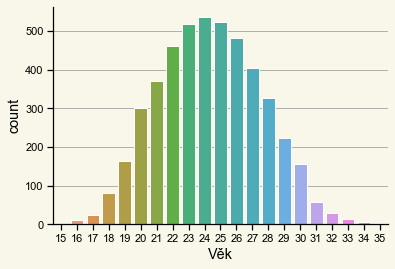

In [51]:
sns.countplot(x = df["Věk"], data = df)

We can observe beautiful Gaussian distribution here. The most popular age for a transfer is 24. What if we check mean value of age for every position?

In [52]:
df_age_position = df.copy()
df_age_position = df_age_position.groupby(["Pozice"])["Věk"].mean().reset_index()
df_age_position = df_age_position.sort_values(by=["Věk"],ascending = False)
df_age_position

,Pozice,Věk
6,Forward,27.000000
11,Midfielder,27.000000
7,Goalkeeper,26.022222
16,Sweeper,26.000000
8,Left Midfield,25.356322
12,Right Midfield,24.904762
5,Defensive Midfield,24.610706
3,Centre-Forward,24.523810
15,Second Striker,24.446154
2,Centre-Back,24.431373


Looks like some position have a few values and need correction. Let's return to the count of position and check how many positions have less than 10 values.

In [53]:
df_pozice_count

,Pozice,Původní tým
3,Centre-Forward,1218
2,Centre-Back,714
1,Central Midfield,487
0,Attacking Midfield,426
5,Defensive Midfield,411
13,Right Winger,305
9,Left Winger,267
10,Left-Back,225
14,Right-Back,181
7,Goalkeeper,180


Last 4 position should be removed from our dataframe for better results.

In [54]:
positions = ["Forward", "Midfielder", "Defender", "Sweeper"]
for pos in positions:
    df_age_position.drop(df_age_position.loc[df_age_position['Pozice']== pos].index, inplace=True)
df_age_position

,Pozice,Věk
7,Goalkeeper,26.022222
8,Left Midfield,25.356322
12,Right Midfield,24.904762
5,Defensive Midfield,24.610706
3,Centre-Forward,24.523810
15,Second Striker,24.446154
2,Centre-Back,24.431373
0,Attacking Midfield,24.197183
14,Right-Back,24.154696
10,Left-Back,24.128889


Goalkeeper is the most aged position while wingers are younger ones.

In [63]:
df_pred = df.copy()
df_pred = df_pred[df_pred["Odhadovaná hodnota"].isnull() == False]

In [65]:
df_pred["Difference"] = df_pred["Odhadovaná hodnota"] - df_pred["Přestupová částka"]

<AxesSubplot:xlabel='Odhadovaná hodnota', ylabel='Přestupová částka'>

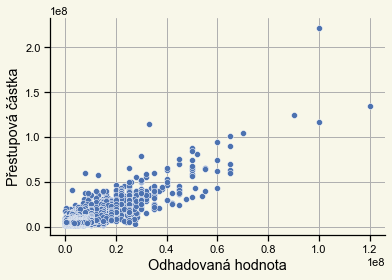

In [66]:
sns.scatterplot(data = df_pred, x = "Odhadovaná hodnota", y = "Přestupová částka")

Scatter plot shows linear dependence of "Přestupová částka" on "Odhadovaná hodnota" with some outliers.

In [78]:
print("Minimal difference: ", df_pred["Difference"].abs().min())
print("Max negative difference: ", df_pred["Difference"].min())
print("Max positive difference: ", df_pred["Difference"].max())
print("Number of precise predictions: ", df_pred[df_pred["Difference"]==0]["Difference"].count())
print("Percent of precise predictions: ", df_pred[df_pred["Difference"]==0]["Difference"].count()/3440 * 100)

Minimal difference:  0.0
Max negative difference:  -122000000.0
Max positive difference:  24500000.0
Number of precise predictions:  210
Percent of precise predictions:  6.104651162790697


## Seasonality

Let's start with top 5 most expencive players for each season.

In [55]:
df_top5_season_p = df.copy()
df_top5_season_p = df_top5_season_p.groupby(["Sezóna", "Jméno"])["Přestupová částka"].sum().reset_index()
df_top5_season_p = df_top5_season_p.sort_values(by=["Sezóna","Přestupová částka"],ascending = False)
df_top5_season_p = df_top5_season_p.groupby("Sezóna").head(5).reset_index()
df_top5_season_p

,index,Sezóna,Jméno,Přestupová částka
0,4522,2018-2019,Kylian Mbappé,135000000
1,4437,2018-2019,Cristiano Ronaldo,117000000
2,4611,2018-2019,Thomas Lemar,70000000
3,4582,2018-2019,Riyad Mahrez,67800000
4,4405,2018-2019,Alisson,62500000
...,...,...,...,...
90,149,2000-2001,Luís Figo,60000000
91,108,2000-2001,Hernán Crespo,56810000
92,151,2000-2001,Marc Overmars,40000000
93,92,2000-2001,Gabriel Batistuta,36150000


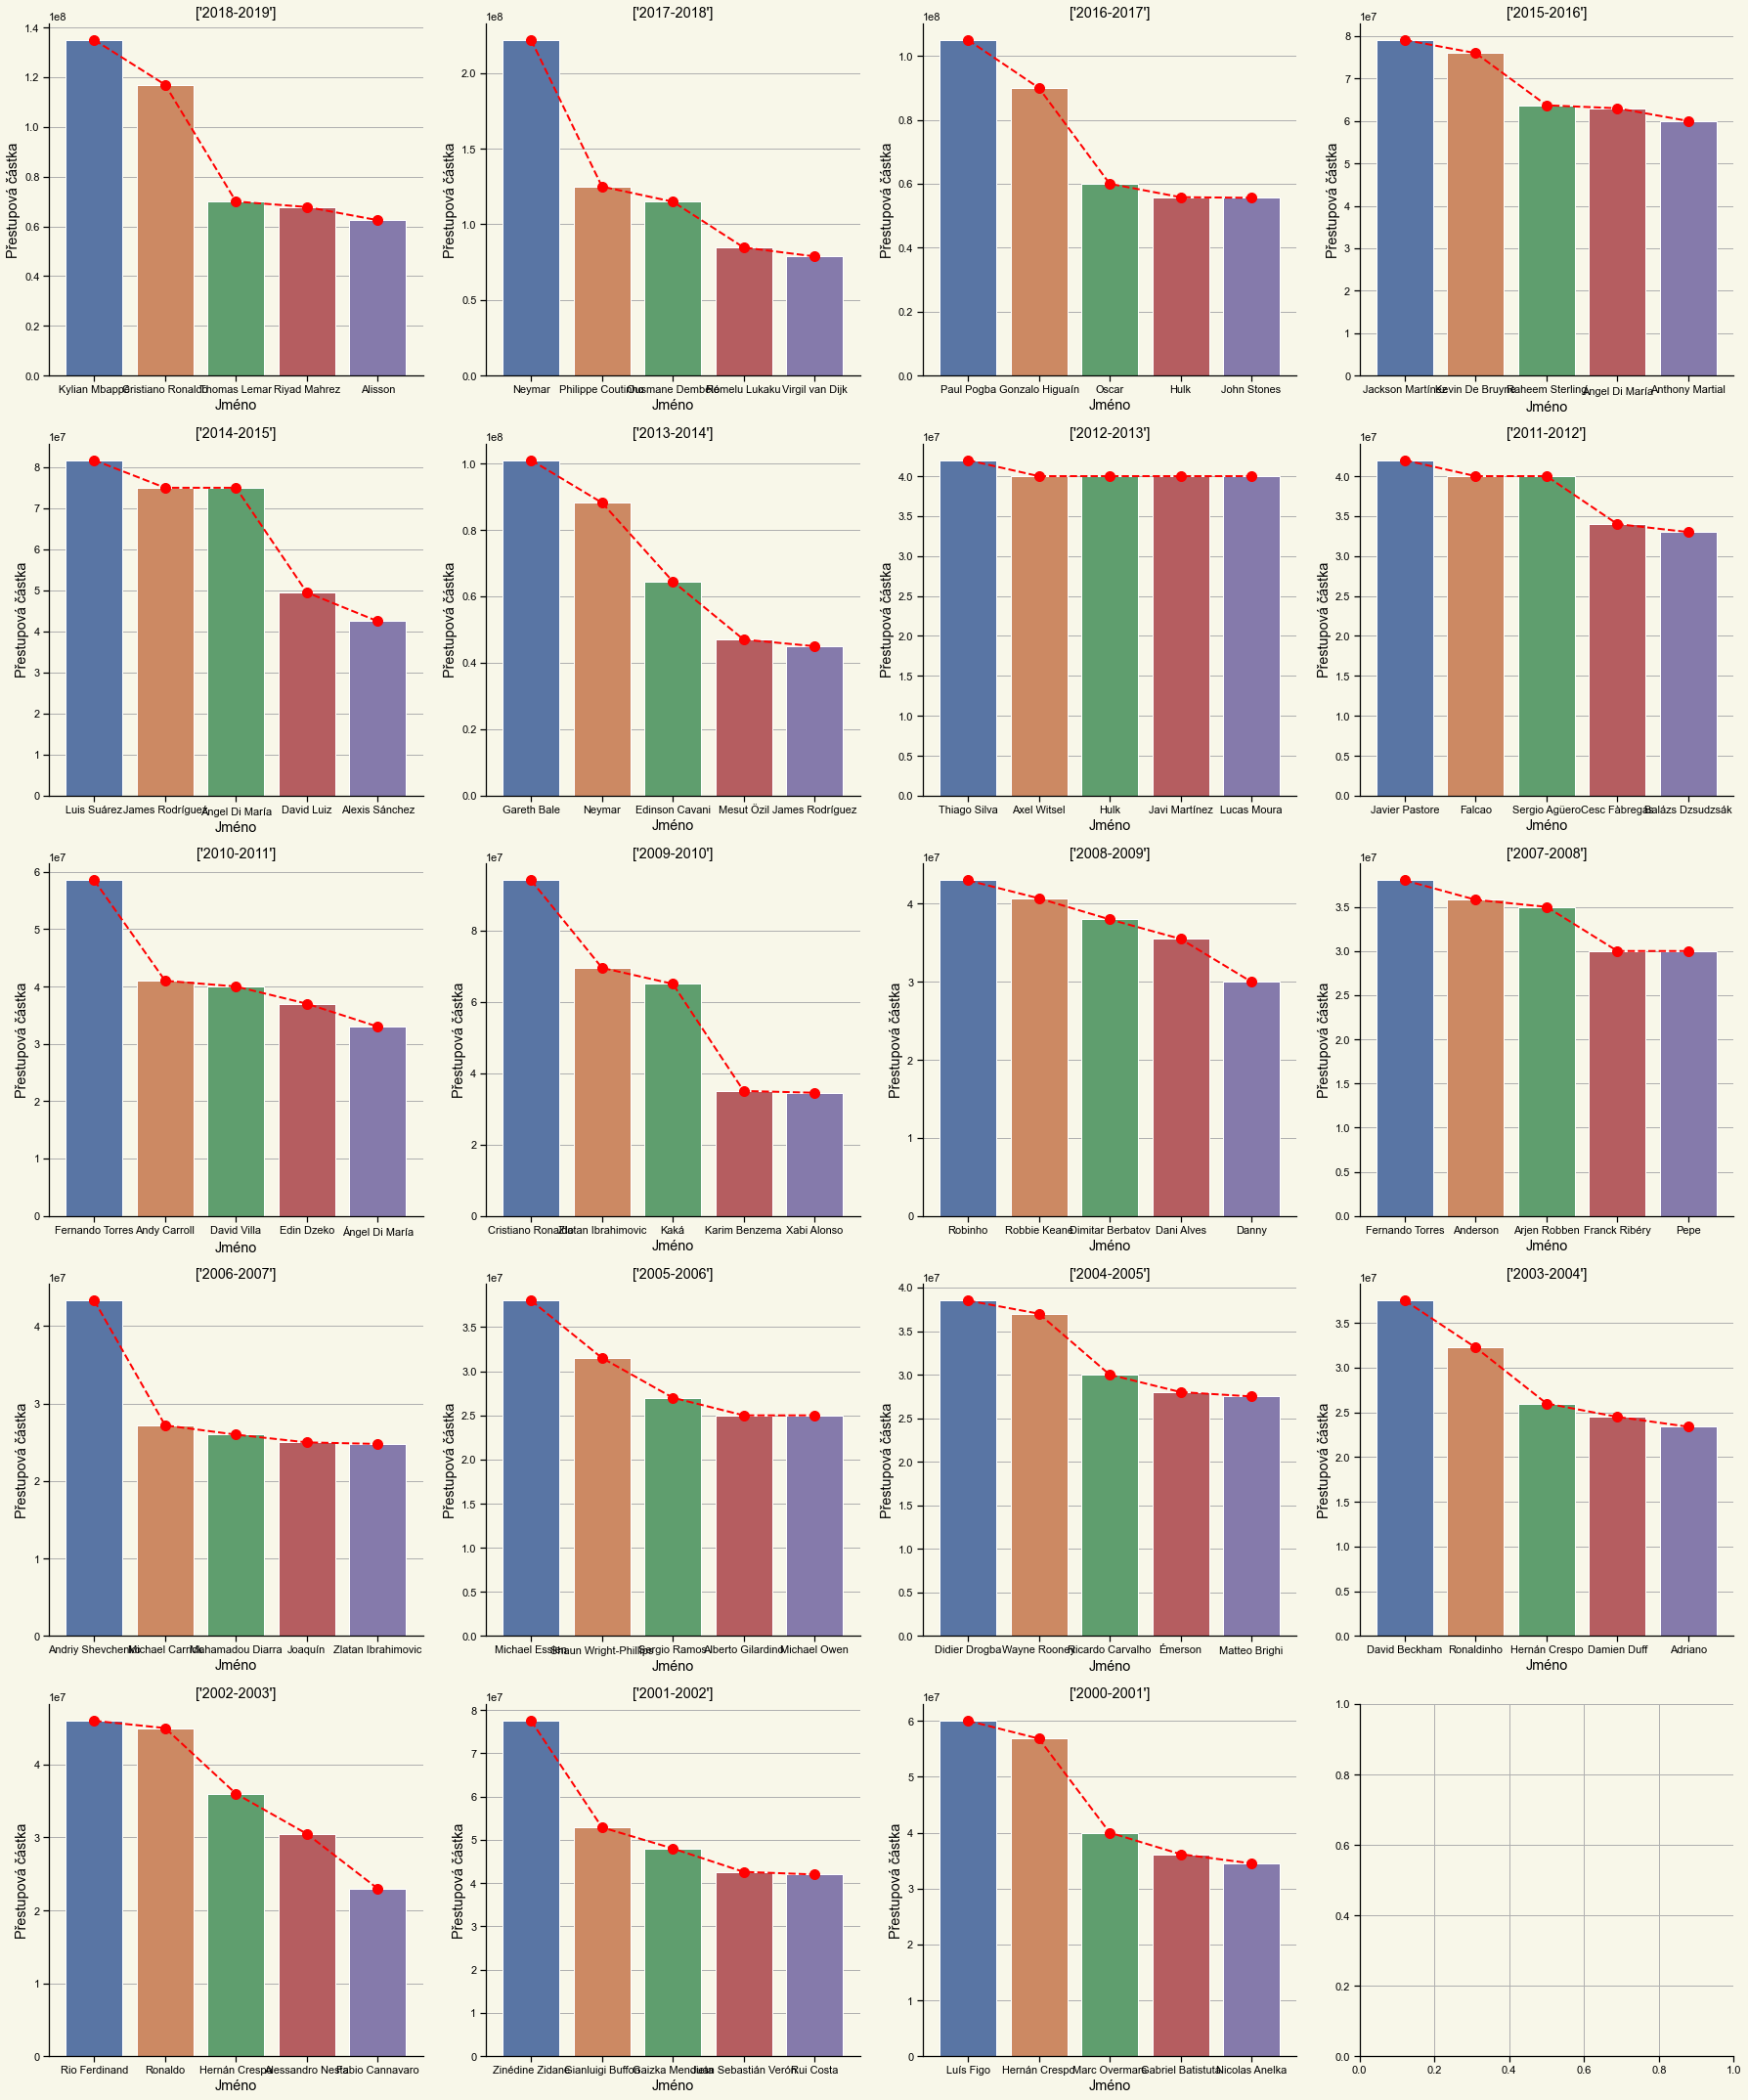

In [56]:
list_df = np.array_split(df_top5_season_p, 19)
fig, ax = plt.subplots(5,4,figsize=(25,30))
ax = ax.flatten()
for i in range(0,19):
    sns.barplot(data = list_df[i] , x = "Jméno", y = "Přestupová částka", ax = ax[i])
    ax[i].plot(
        ax[i].get_xticks(), list_df[i]["Přestupová částka"],
        color='red', linestyle='--', marker='.',
        markersize=20, linewidth=2
    )
    lims = ax[i].get_ylim()
    ax[i].set_title(list_df[i]["Sezóna"].unique())
plt.tight_layout()

Now top 5 team with biggest spences for each season.

In [57]:
df_top5_season_t = df.copy()
df_top5_season_t = df_top5_season_t.groupby(["Sezóna", "Nový tým"])["Přestupová částka"].sum().reset_index()
df_top5_season_t = df_top5_season_t.sort_values(by=["Sezóna","Přestupová částka"],ascending = False)
df_top5_season_t = df_top5_season_t.groupby("Sezóna").head(5).reset_index()
df_top5_season_t

,index,Sezóna,Nový tým,Přestupová částka
0,1831,2018-2019,Juventus,221900000
1,1837,2018-2019,Liverpool,182200000
2,1852,2018-2019,Paris SG,135000000
3,1790,2018-2019,Atlético Madrid,108000000
4,1814,2018-2019,FC Barcelona,107900000
...,...,...,...,...
90,76,2000-2001,Real Madrid,119250000
91,49,2000-2001,Lazio,107460000
92,4,2000-2001,AS Roma,103350000
93,31,2000-2001,FC Barcelona,97100000


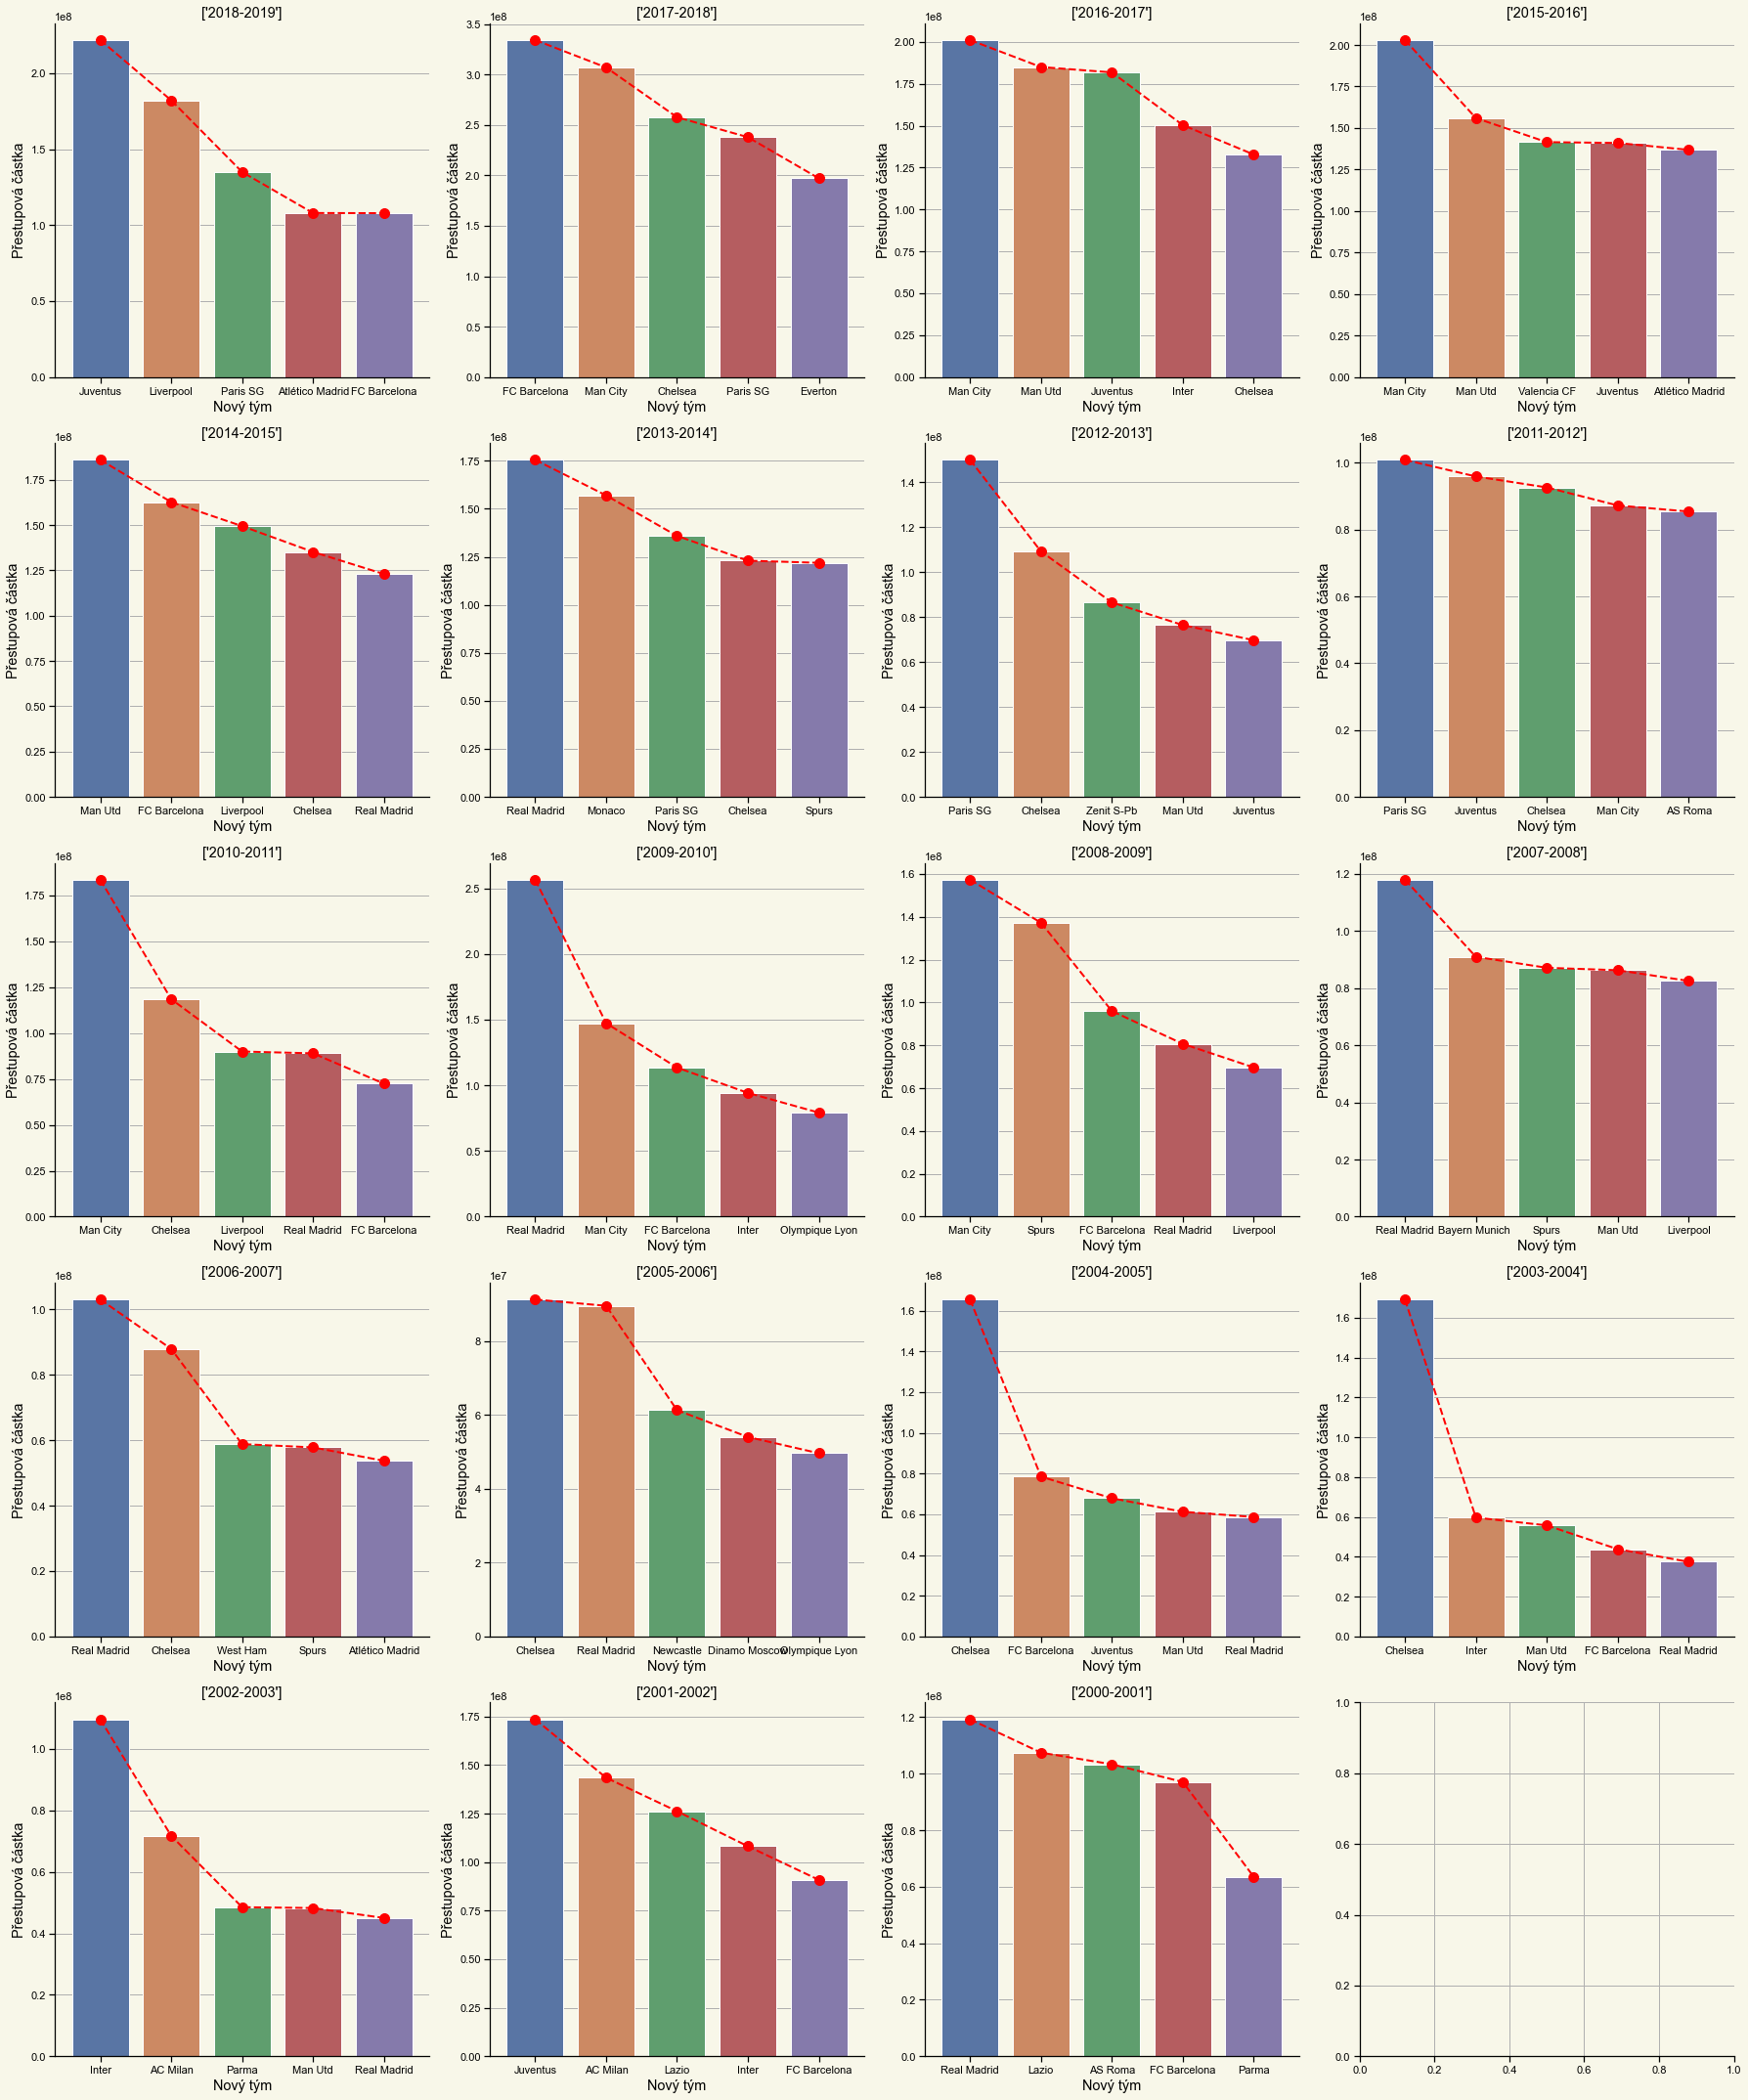

In [58]:
list_df = np.array_split(df_top5_season_t, 19)
fig, ax = plt.subplots(5,4,figsize=(25,30))
ax = ax.flatten()
for i in range(0,19):
    sns.barplot(data = list_df[i] , x = "Nový tým", y = "Přestupová částka", ax = ax[i])
    ax[i].plot(
        ax[i].get_xticks(), list_df[i]["Přestupová částka"],
        color='red', linestyle='--', marker='.',
        markersize=20, linewidth=2
    )
    lims = ax[i].get_ylim()
    ax[i].set_title(list_df[i]["Sezóna"].unique())
plt.tight_layout()

And, finally, top 5 leagues with the biggest spences for each season.

In [59]:
df_top5_season_l = df.copy()
df_top5_season_l = df_top5_season_l.groupby(["Sezóna", "Nová  Liga"])["Přestupová částka"].sum().reset_index()
df_top5_season_l = df_top5_season_l.sort_values(by=["Sezóna","Přestupová částka"],ascending = False)
df_top5_season_l = df_top5_season_l.groupby("Sezóna").head(5).reset_index()
df_top5_season_l

,index,Sezóna,Nová Liga,Přestupová částka
0,380,2018-2019,Premier League,1023200000
1,385,2018-2019,Serie A,782700000
2,374,2018-2019,LaLiga,583300000
3,370,2018-2019,1.Bundesliga,334500000
4,378,2018-2019,Ligue 1,303000000
...,...,...,...,...
90,14,2000-2001,Serie A,479100000
91,12,2000-2001,Premier League,443700000
92,9,2000-2001,LaLiga,362270000
93,11,2000-2001,Ligue 1,196650000


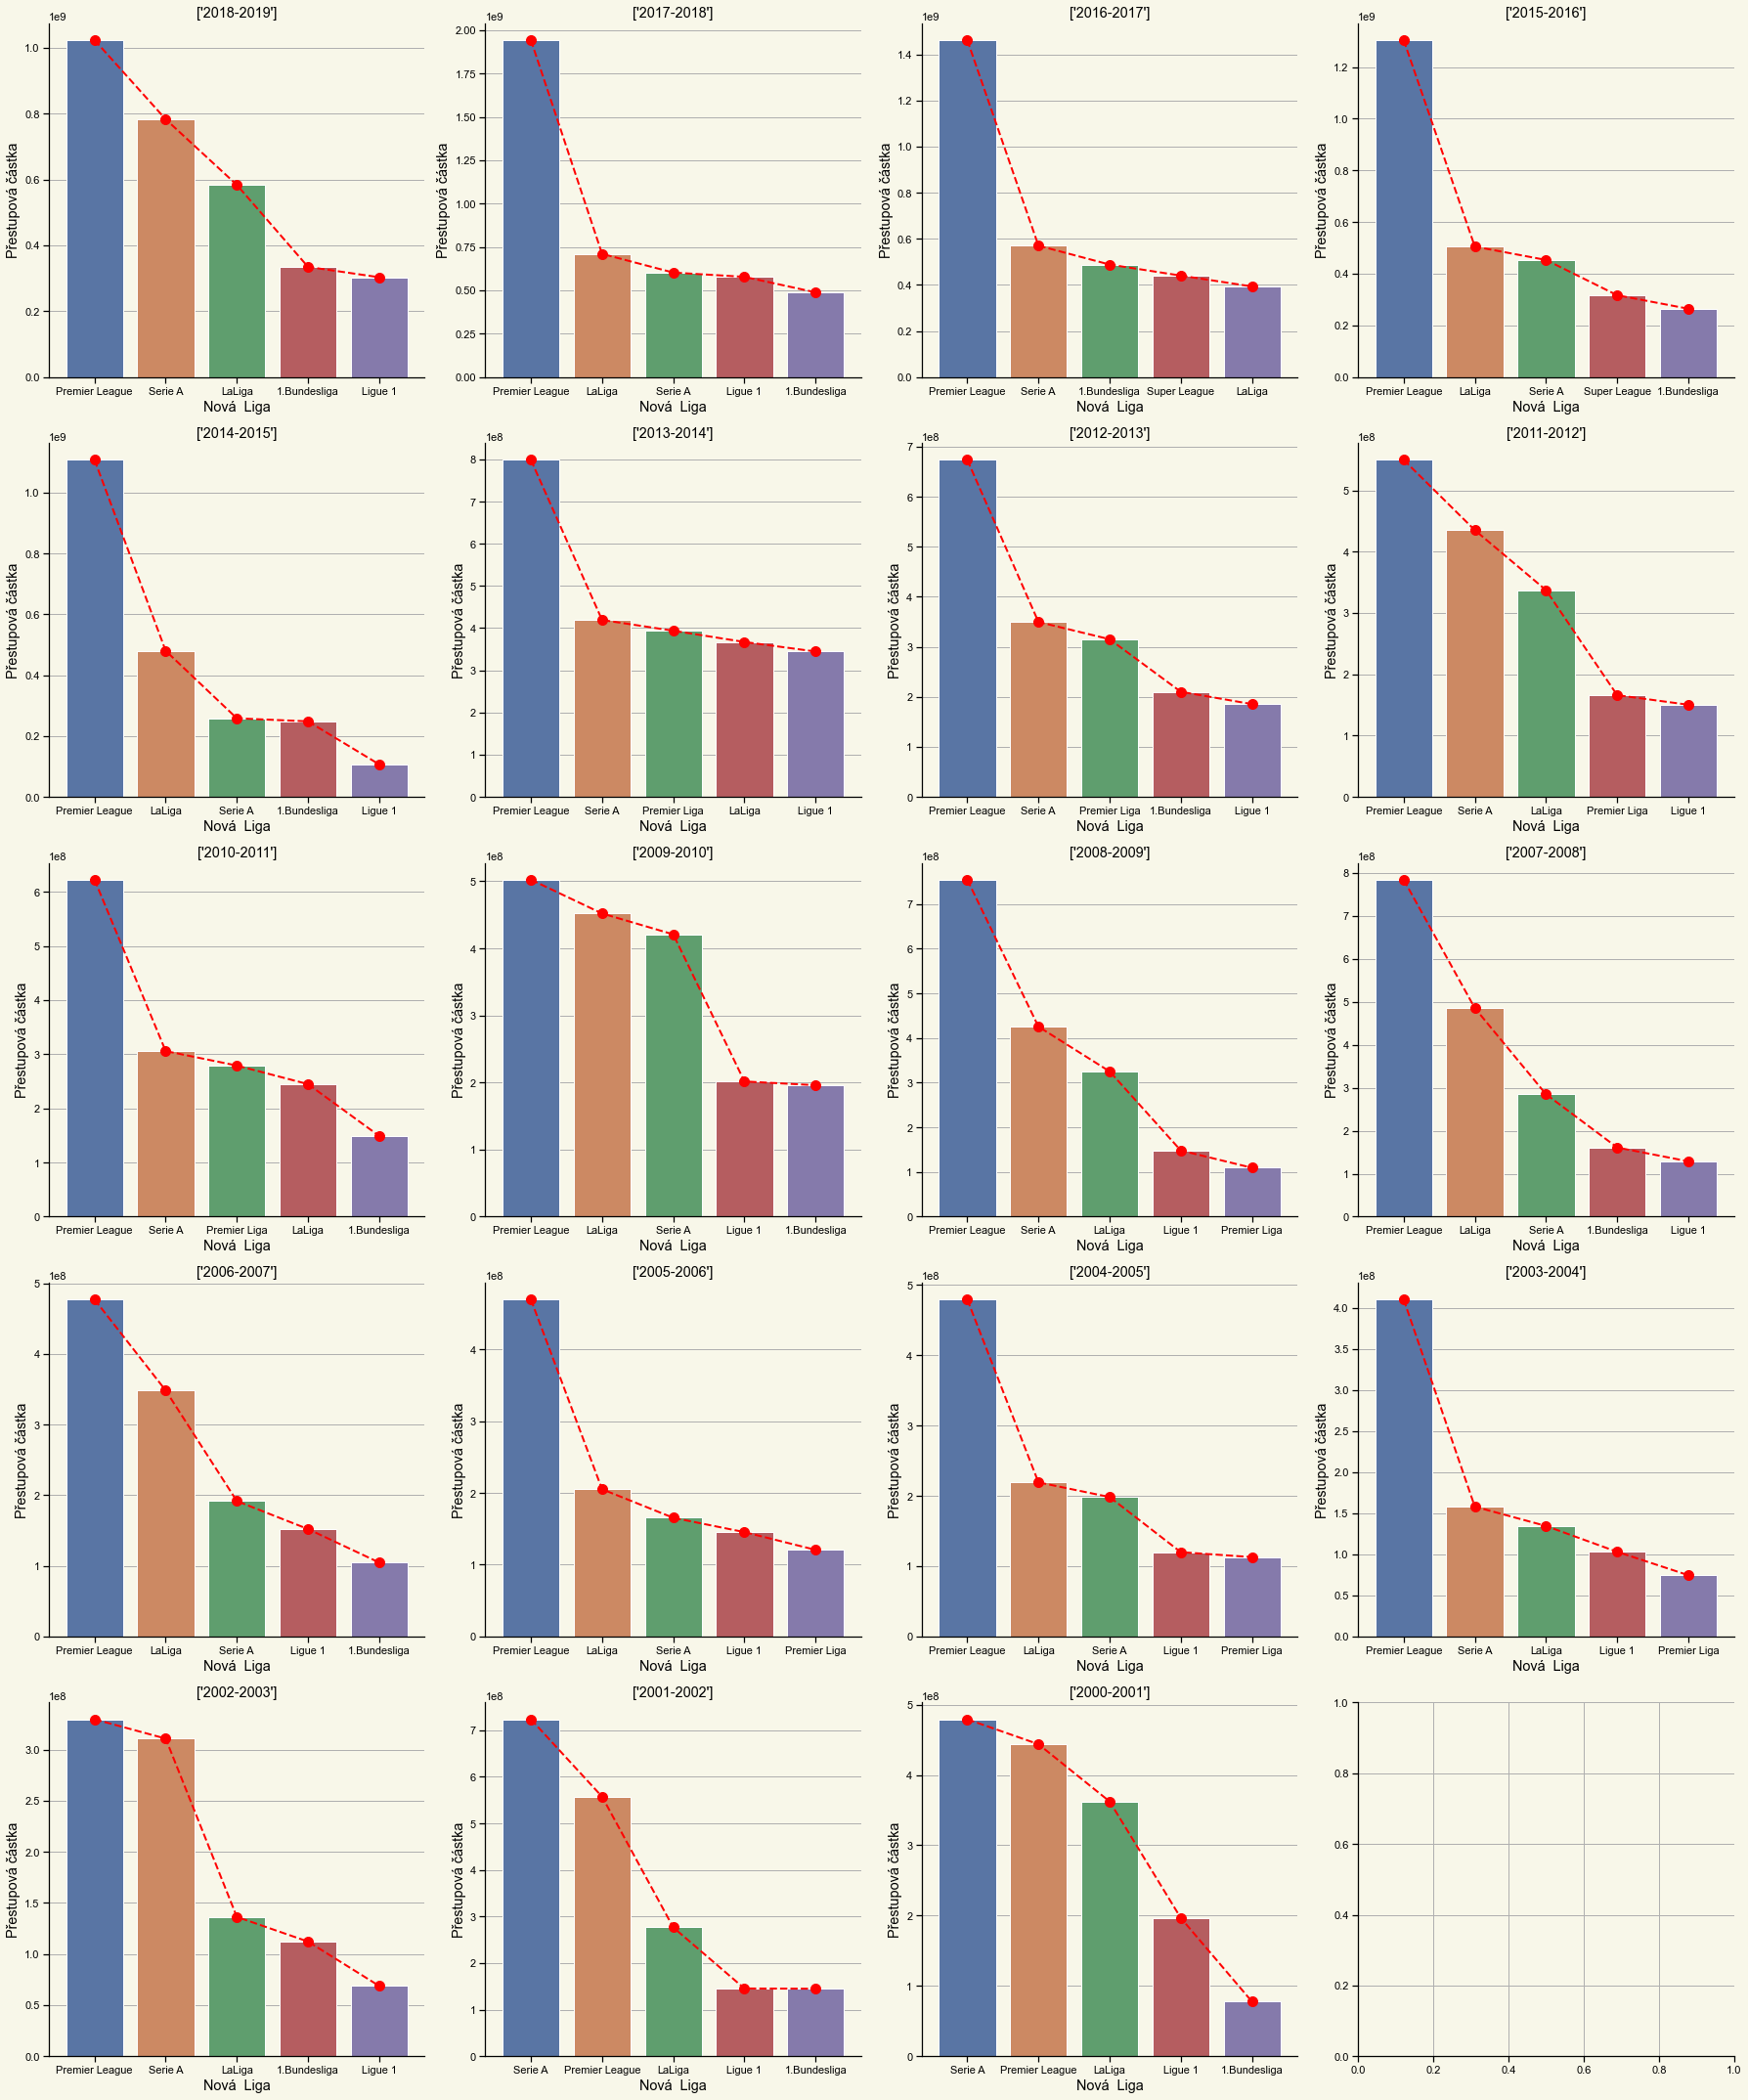

In [60]:
list_df = np.array_split(df_top5_season_l, 19)
fig, ax = plt.subplots(5,4,figsize=(25,30))
ax = ax.flatten()
for i in range(0,19):
    sns.barplot(data = list_df[i] , x = "Nová  Liga", y = "Přestupová částka", ax = ax[i])
    ax[i].plot(
        ax[i].get_xticks(), list_df[i]["Přestupová částka"],
        color='red', linestyle='--', marker='.',
        markersize=20, linewidth=2
    )
    lims = ax[i].get_ylim()
    ax[i].set_title(list_df[i]["Sezóna"].unique())
plt.tight_layout()

### I would like to thank you for your time. I hope you'll enjoy  results of my work! </br>

### Alexandr Kolomijec